In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer 
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수 
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model

# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

Segment별 일시불 소비 관련 변수 평균값 (단위: 원 또는 건수)


,이용금액_일시불_R12M,이용금액_일시불_R6M,이용금액_일시불_R3M,이용금액_일시불_B0M,최대이용금액_일시불_R12M,이용건수_일시불_R12M,이용건수_일시불_R6M,이용건수_일시불_R3M,이용건수_일시불_B0M
Segment,,,,,,,,,
A,383015.6,114670.5,57948.2,19907.4,67452.7,611.9,317.3,159.6,52.2
B,323990.8,104607.0,52665.7,18011.1,47270.5,626.1,326.2,162.8,53.2
C,176200.5,70802.3,34922.7,11701.7,31902.7,458.8,229.7,115.1,37.7
D,98273.6,45821.5,22395.2,7406.6,17728.7,360.5,178.7,88.7,29.0
E,26353.9,14166.9,6961.6,2340.2,5682.9,121.2,64.5,31.6,10.2


<Figure size 1600x800 with 0 Axes>

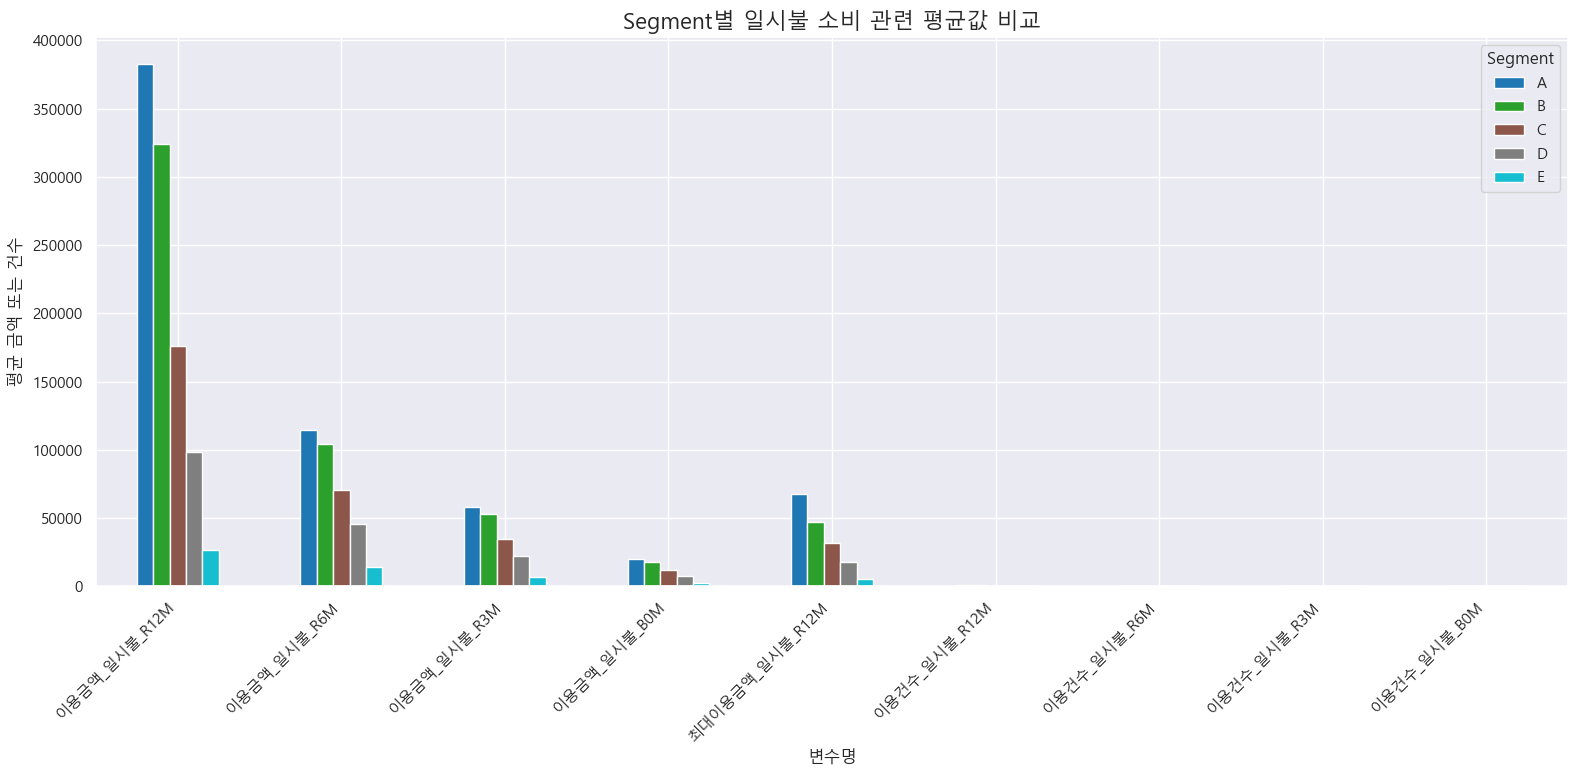

In [8]:
# 1.사용할 컬럼 리스트 정의
columns_il = [
    '이용금액_일시불_R12M',
    '이용금액_일시불_R6M',
    '이용금액_일시불_R3M',
    '이용금액_일시불_B0M',
    '최대이용금액_일시불_R12M',
    '이용건수_일시불_R12M',
    '이용건수_일시불_R6M',
    '이용건수_일시불_R3M',
    '이용건수_일시불_B0M'
]

# 2.필요한 컬럼만 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_il)

# 3.병합
df = pd.merge(df_member, df_sales, on='ID')

# 4.Segment별 평균값 계산
segment_means = df.groupby('Segment')[columns_il].mean().round(1)  # 소수점 1자리로 깔끔하게

# 5.표로 출력
from IPython.display import display
print("Segment별 일시불 소비 관련 변수 평균값 (단위: 원 또는 건수)")
display(segment_means)

# 6.그래프로 시각화 (세로 막대)
plt.figure(figsize=(16, 8))
segment_means.T.plot(kind='bar', figsize=(16, 8), colormap='tab10')

plt.title('Segment별 일시불 소비 관련 평균값 비교', fontsize=16)
plt.ylabel('평균 금액 또는 건수')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- 소비금액과 이용건수의 차이?
- 금액에 집중하는지?

### 인사이트 도출
- A에서 E로 갈수록 이용금액이 줄어드는 것을 볼 수 있다.
- B가 A보다 이용 건수는 많지만 금액은 적다 -> A등급의 사람들이 가격대가 높은 이용이 많다.

Segment별 청구 및 입금 관련 변수 평균값


,정상청구원금_B0M,정상청구원금_B2M,정상입금원금_B0M,정상입금원금_B2M,정상입금원금_B5M,연체입금원금_B0M
Segment,,,,,,
A,37794.3,40439.0,33309.7,36221.7,42909.6,3662.3
B,36986.0,39872.4,23212.3,26432.6,30778.2,8972.0
C,18517.8,19186.7,12567.1,13072.5,14374.6,4914.9
D,10263.2,10771.9,7071.4,7307.0,7704.8,2443.9
E,3175.6,3409.4,2219.1,2288.3,2158.2,731.8


<Figure size 1600x800 with 0 Axes>

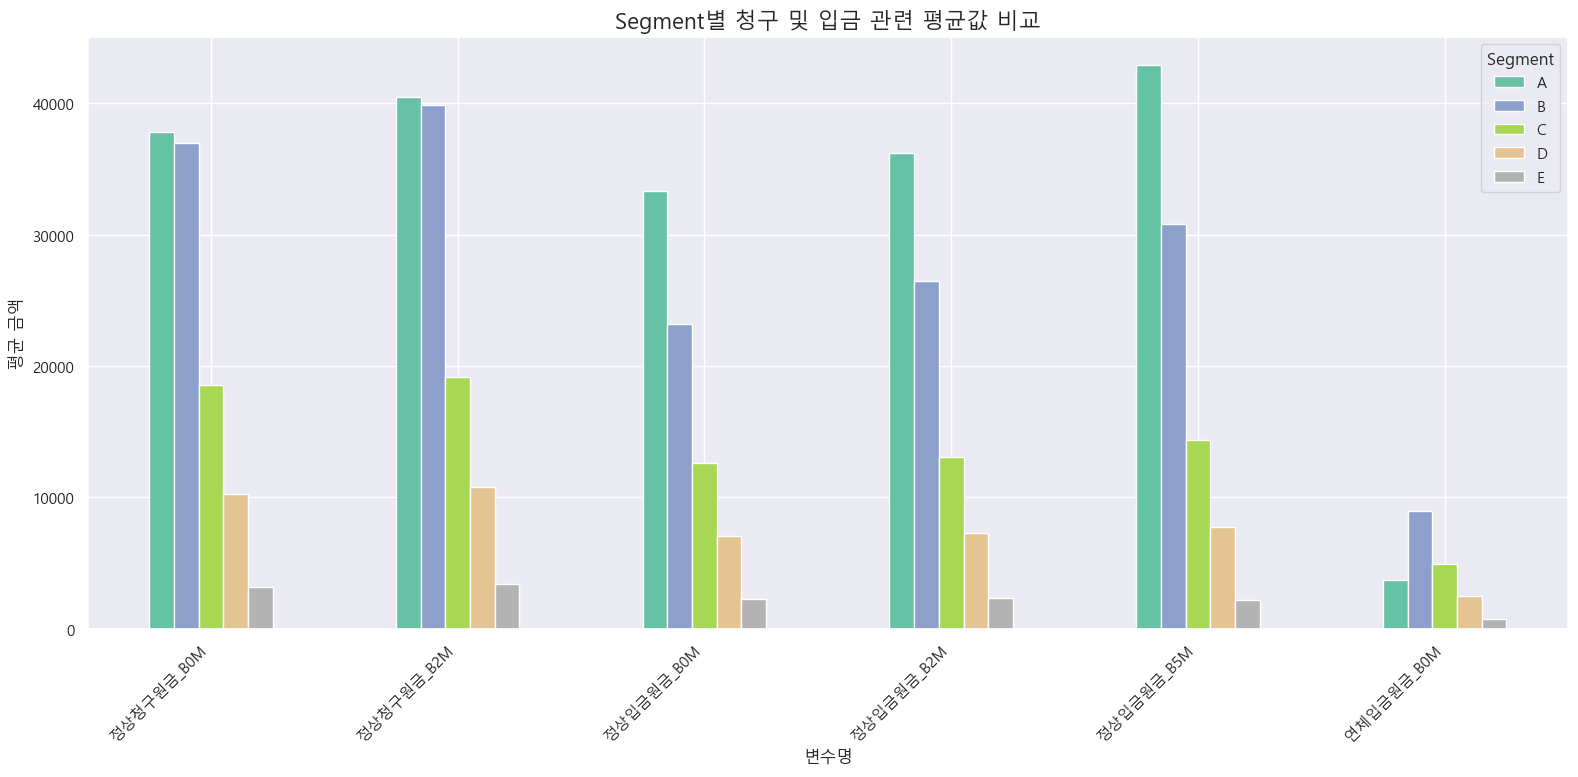

In [12]:
# 1. 사용할 컬럼
columns_bill = [
    '정상청구원금_B0M',
    '정상청구원금_B2M',
    '정상입금원금_B0M',
    '정상입금원금_B2M',
    '정상입금원금_B5M',
    '연체입금원금_B0M'
]

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_bill = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_bill)

# 3. 병합
df = pd.merge(df_member, df_bill, on='ID')

# 4. Segment별 평균값 계산
segment_means = df.groupby('Segment')[columns_bill].mean().round(1)

# 5. 표 출력
print("Segment별 청구 및 입금 관련 변수 평균값")
display(segment_means)

# 6. 그래프 시각화
plt.figure(figsize=(16, 8))
segment_means.T.plot(kind='bar', figsize=(16, 8), colormap='Set2')

plt.title('Segment별 청구 및 입금 관련 평균값 비교', fontsize=16)
plt.ylabel('평균 금액')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- 정상 청구 및 입금 금액 차이를 통한 상환능력?
- 청구액/ 입금액의 상관성?
- 많은 현금 흐름이 세그먼트에 끼치는 영향?

### 인사이트 도출
- A에서 E로 갈수록 청구 및 입금 금액이 줄어드는 것을 볼 수 있다.

Segment별 잔액 및 평잔 변수 평균값


,잔액_일시불_B0M,잔액_할부_B0M,월중평잔_일시불,월중평잔_일시불_B0M,평잔_일시불_6M,평잔_일시불_3M
Segment,,,,,,
A,20699.6,10357.1,23660.1,26177.6,23138.4,22988.3
B,19377.4,15701.1,19716.8,22335.6,16162.8,18262.5
C,11505.4,4030.8,13293.5,13593.0,14118.2,13929.4
D,7208.9,2688.1,8239.8,8286.6,9045.8,8841.0
E,2039.2,1045.1,2371.7,2334.9,2640.1,2594.4


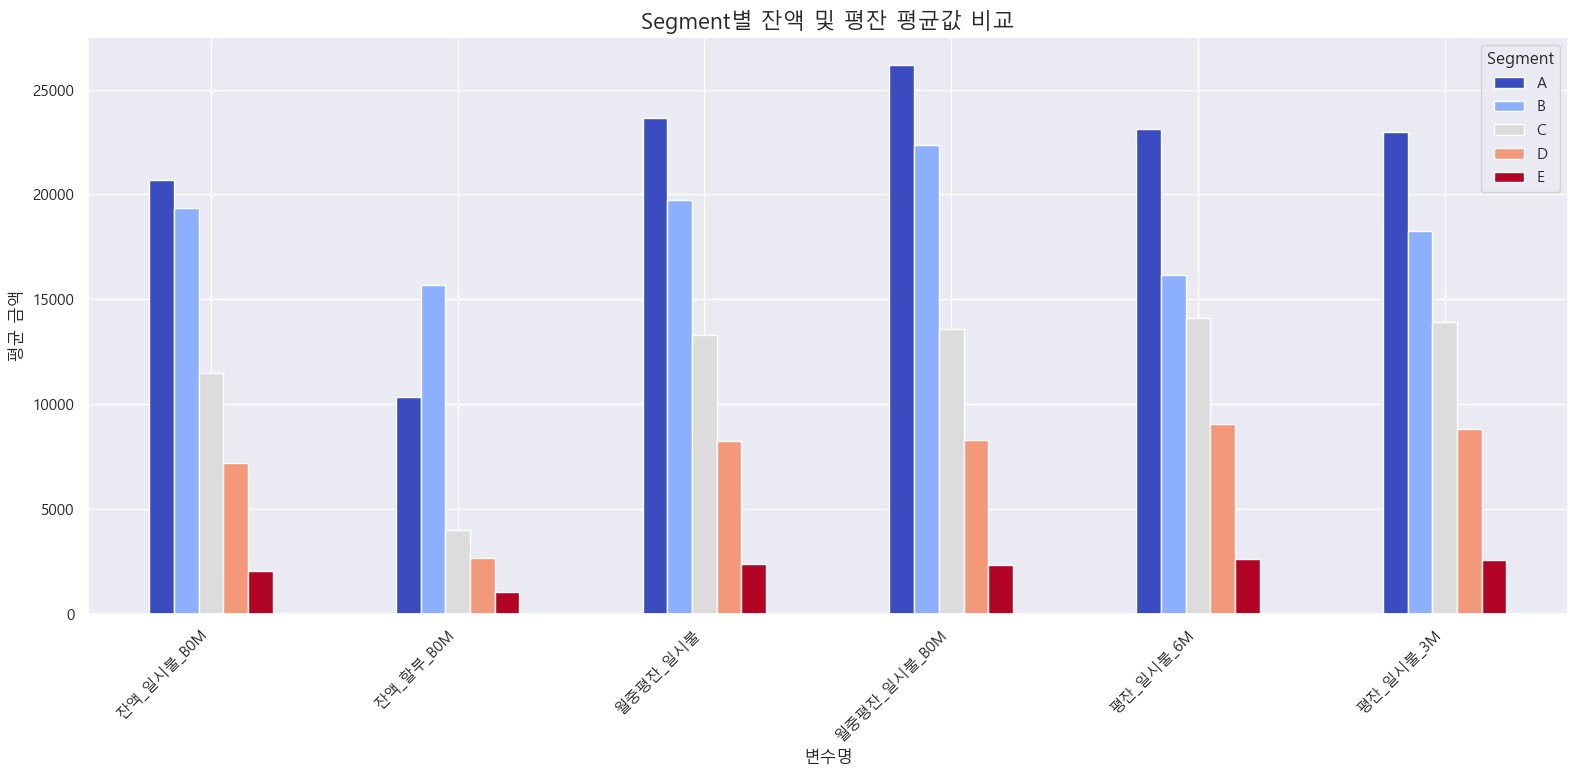

In [18]:
# 1. 변수 리스트
columns_balance = [
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
    '월중평잔_일시불',
    '월중평잔_일시불_B0M',
    '평잔_일시불_6M',
    '평잔_일시불_3M'
]

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_balance = pd.read_parquet('open/train/5.잔액정보', columns=['ID'] + columns_balance)

# 3. 병합
df = pd.merge(df_member, df_balance, on='ID')

# 4. 세그먼트별 평균값 계산
segment_means = df.groupby('Segment')[columns_balance].mean().round(1)

# 5. 표 출력
print("Segment별 잔액 및 평잔 변수 평균값")
display(segment_means)

# 6. 시각화
segment_means.T.plot(kind='bar', figsize=(16, 8), colormap='coolwarm')

plt.title('Segment별 잔액 및 평잔 평균값 비교', fontsize=16)
plt.ylabel('평균 금액')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- 세그먼트별로 지불할 잔액이 얼마나 남아있는지?
- 세그먼트와의 유의미한 관계가 있는지?

### 인사이트 도출
- 할부 잔액 부분에서는 B가 A보다 높기는 하지만 대체적으로 A가 잔액이 많은걸로 보인다
- A등급에서 E등급으로 갈 수록 소비액이 높다는 것을 알 수 있다.

Segment별 오프라인 및 업종별 소비 패턴 평균값


,이용금액_오프라인_B0M,이용금액_오프라인_R3M,이용금액_오프라인_R6M,_1순위업종_이용금액,_2순위업종_이용금액,_3순위업종_이용금액,_1순위쇼핑업종_이용금액,_2순위쇼핑업종_이용금액,_3순위쇼핑업종_이용금액,쇼핑_도소매_이용금액,_1순위교통업종_이용금액,이용가맹점수
Segment,,,,,,,,,,,,
A,20009.1,71425.1,181876.1,40683.5,12467.5,7499.4,14792.8,2918.7,1697.5,3362.4,2581.2,70.5
B,16930.7,61970.0,157919.5,48690.6,10614.0,6202.6,18717.6,3160.3,1822.3,3486.0,2370.2,73.2
C,10466.1,35076.9,80264.3,18209.5,6239.2,3657.2,6854.9,1491.2,1054.0,1578.1,1948.3,50.9
D,7759.0,23776.9,49876.7,11164.6,4007.9,2329.7,4207.4,1001.9,722.8,971.5,1481.0,39.7
E,2320.5,7273.2,15376.5,3445.3,1297.1,733.6,1174.8,366.8,247.0,367.8,547.2,14.4


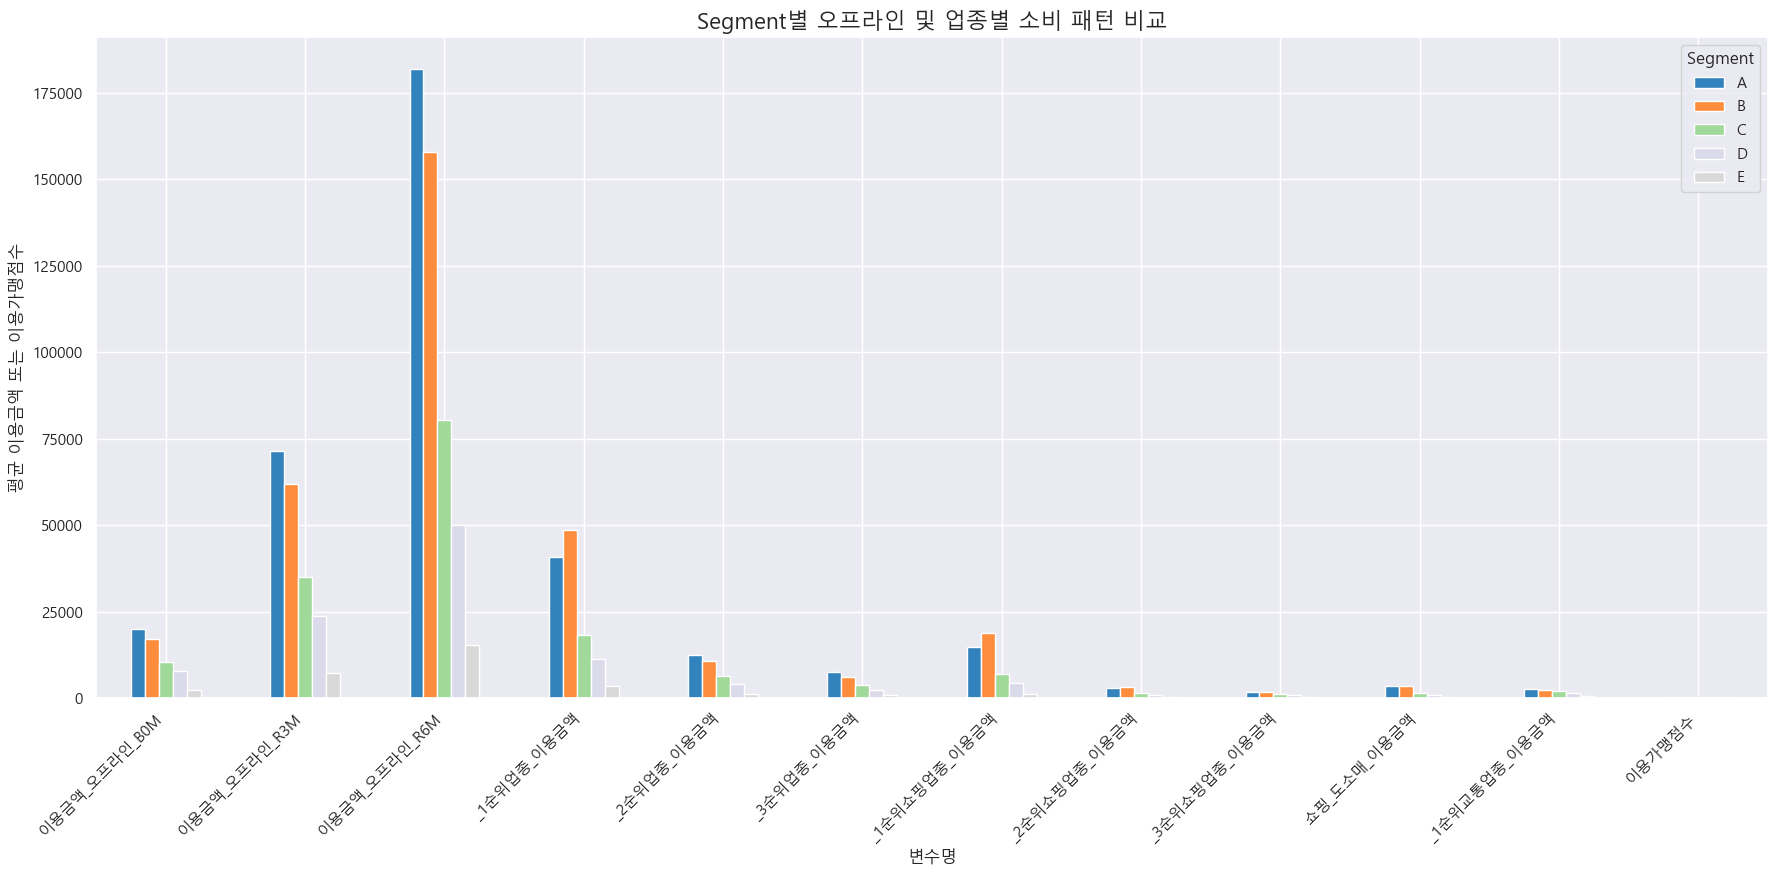

In [20]:
# 1. 변수 리스트
columns_offline = [
    '이용금액_오프라인_B0M',
    '이용금액_오프라인_R3M',
    '이용금액_오프라인_R6M',
    '_1순위업종_이용금액',
    '_2순위업종_이용금액',
    '_3순위업종_이용금액',
    '_1순위쇼핑업종_이용금액',
    '_2순위쇼핑업종_이용금액',
    '_3순위쇼핑업종_이용금액',
    '쇼핑_도소매_이용금액',
    '_1순위교통업종_이용금액',
    '이용가맹점수'
]

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_offline = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_offline)

# 3. 병합
df = pd.merge(df_member, df_offline, on='ID')

# 4. 세그먼트별 평균값 계산
segment_means = df.groupby('Segment')[columns_offline].mean().round(1)

# 5. 표 출력
print("Segment별 오프라인 및 업종별 소비 패턴 평균값")
display(segment_means)

# 6. 시각화
segment_means.T.plot(kind='bar', figsize=(18, 9), colormap='tab20c')

plt.title('Segment별 오프라인 및 업종별 소비 패턴 비교', fontsize=16)
plt.ylabel('평균 이용금액 또는 이용가맹점수')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
 - 오프라인 소비 금약과 업종, 가맹점 수 차이로 고객의 활동성을 파악 가능하다
 - 업종별 집중 소비가 세그먼트에 유의미한 결과를 보여주는가?

### 인사이트 도출
-이용 금액은 A등급이 B등급에 비해 높지만, 1순위2순위 업종 및 가맹점 이용 수에서는 B등급이 A등급보다 높다.
> A등급이 되기 위한 B등급의 발버둥이 아닐까?
-> 이유 : '행복한 2등은 없다'

Segment별 이용 건수(소비 빈도 및 활동성) 평균값


,이용건수_신용_B0M,이용건수_신용_R3M,이용건수_신용_R6M,이용건수_신용_R12M,이용건수_신판_B0M,이용건수_신판_R3M,이용건수_신판_R6M,이용건수_신판_R12M,이용건수_오프라인_B0M,이용건수_오프라인_R3M,이용건수_오프라인_R6M
Segment,,,,,,,,,,,
A,53.6,163.8,327.0,633.0,53.0,162.1,323.5,626.5,44.4,147.6,338.4
B,55.5,169.7,342.2,661.3,54.7,167.3,337.3,652.0,44.8,150.4,350.3
C,38.5,117.5,235.2,470.8,38.1,116.4,233.1,466.7,31.8,100.6,216.2
D,29.5,90.4,182.5,368.9,29.3,89.8,181.4,366.7,23.9,73.7,154.7
E,10.3,32.1,65.6,123.8,10.3,32.0,65.4,123.3,8.9,26.6,53.2


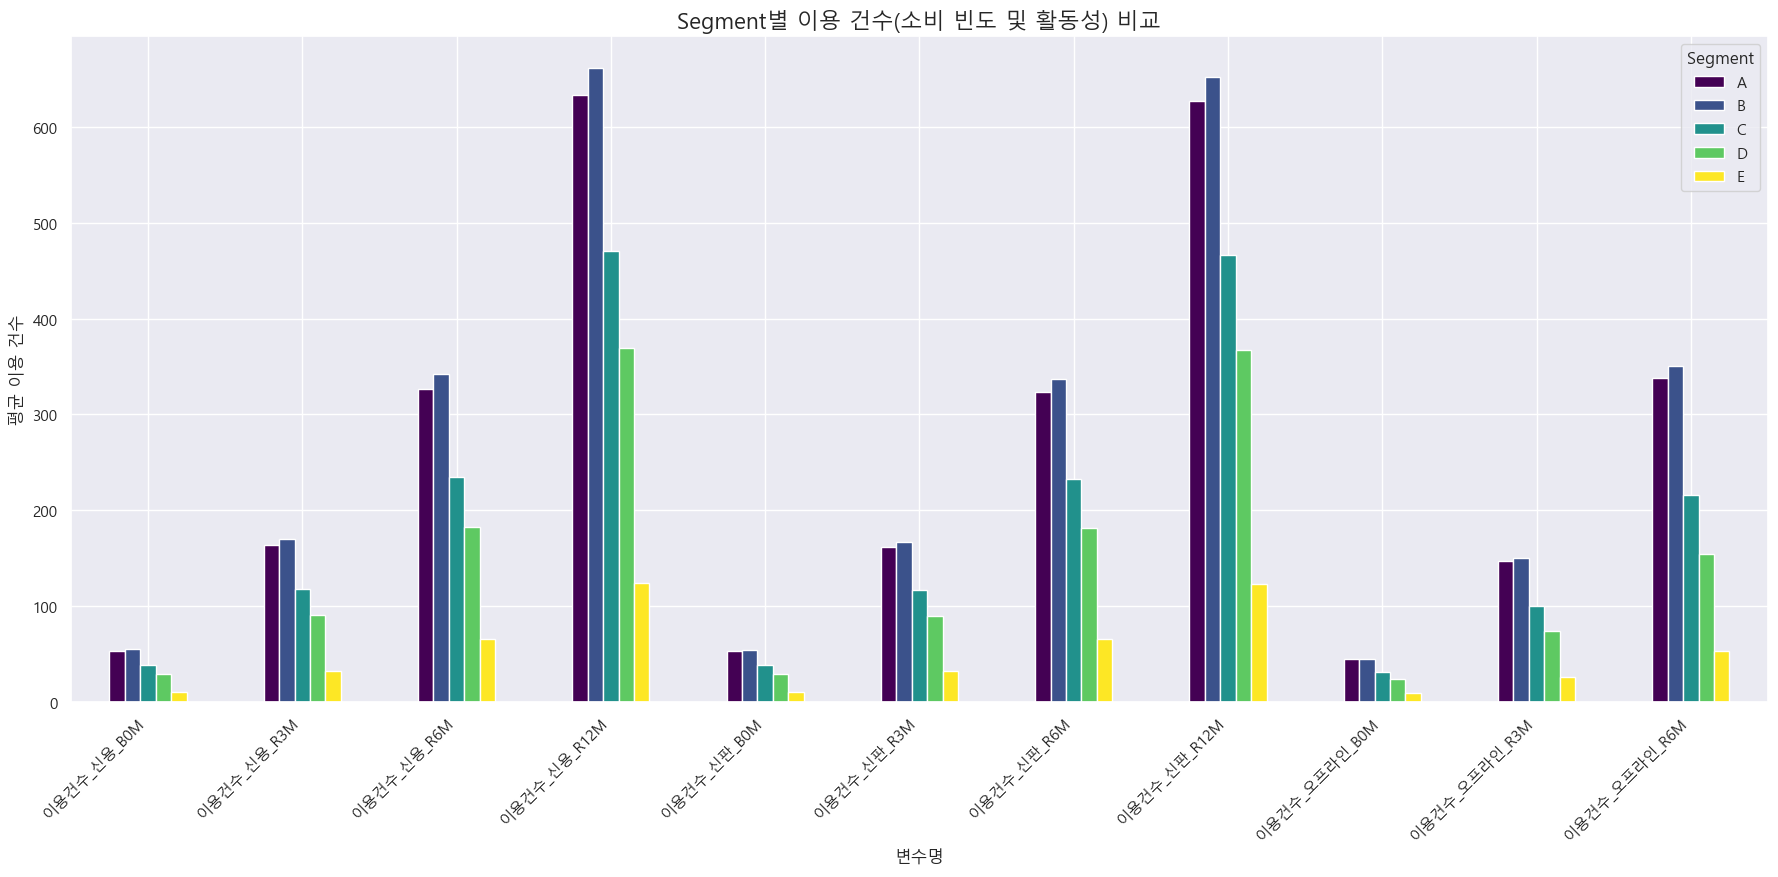

In [27]:
# 1. 변수 리스트
columns_usage = [
    '이용건수_신용_B0M',
    '이용건수_신용_R3M',
    '이용건수_신용_R6M',
    '이용건수_신용_R12M',
    '이용건수_신판_B0M',
    '이용건수_신판_R3M',
    '이용건수_신판_R6M',
    '이용건수_신판_R12M',
    '이용건수_오프라인_B0M',
    '이용건수_오프라인_R3M',
    '이용건수_오프라인_R6M'
]

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_usage = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_usage)

# 3. 병합
df = pd.merge(df_member, df_usage, on='ID')

# 4. 세그먼트별 평균값 계산
segment_means = df.groupby('Segment')[columns_usage].mean().round(1)

# 5. 표 출력
print("Segment별 이용 건수(소비 빈도 및 활동성) 평균값")
display(segment_means)

# 6. 시각화
segment_means.T.plot(kind='bar', figsize=(18, 9), colormap='viridis')

plt.title('Segment별 이용 건수(소비 빈도 및 활동성) 비교', fontsize=16)
plt.ylabel('평균 이용 건수')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- 세그먼트 별 카드별 이용 빈도 차이로 고객의 충성도 및 활동성 판단
- 빈도가 낮은 세그먼트는 휴먼 / 이탈 과 같은 위험군일 가능성도 고려

### 인사이트 도출
- 전체적으로 B등급이 A등급보다 높음
- >개인적인 생각 : 아까와 마찬가지로 '행복한 2등은 없다'의 심리가 작용된 것은 아닐까?

Segment별 총 이용금액 / 카드 기준 평균값 (이용금액대 제외)


,_1순위카드이용금액,_2순위카드이용금액,이용금액_R3M_신용체크,이용금액_R3M_신용
Segment,,,,
A,72325.2,12890.1,98294.2,97090.1
B,69698.9,9261.8,91296.1,88537.1
C,36108.0,11865.9,60613.2,54590.5
D,22413.4,8680.8,38603.9,34187.2
E,7250.0,1838.8,10054.6,9196.7


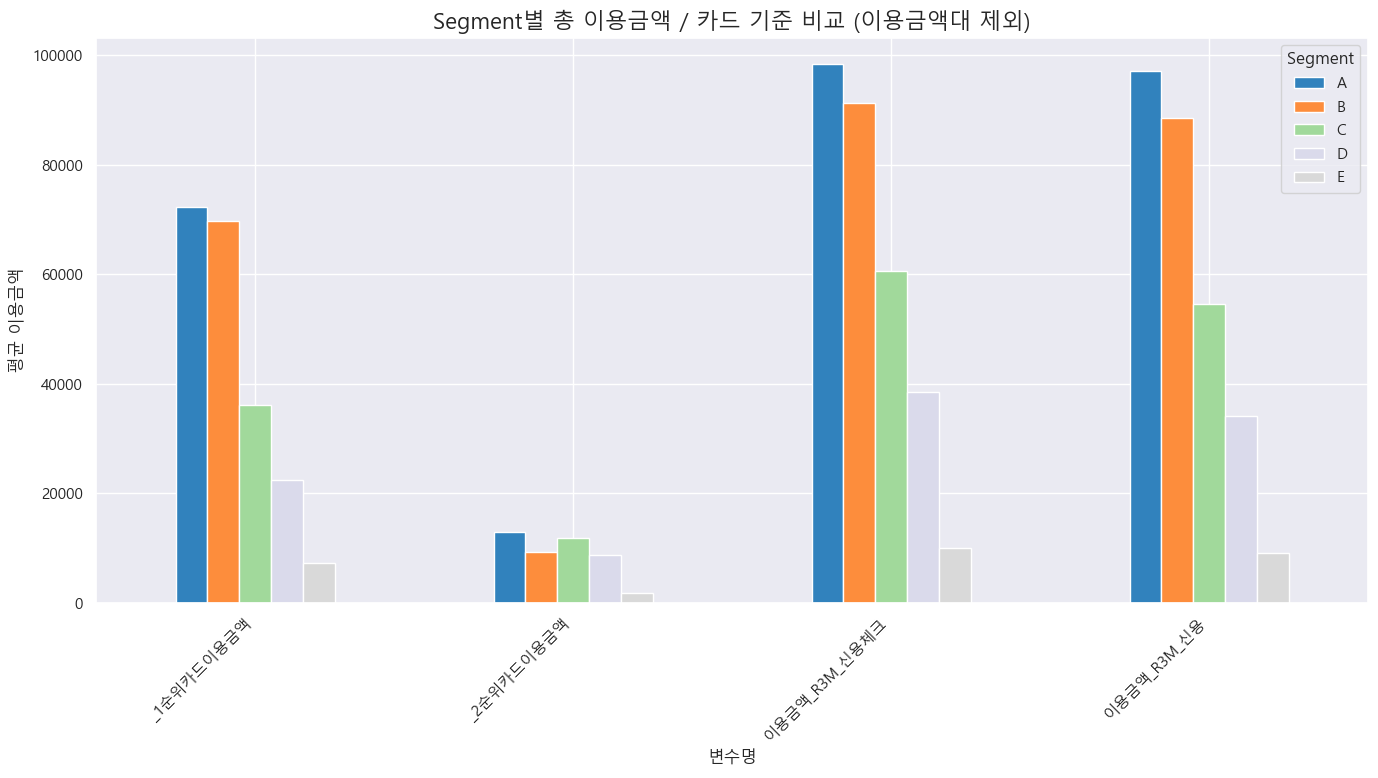

In [33]:
# 1. 변수 리스트 분리 (이용금액대 제외)
columns_amount_sales = ['ID', '이용금액대']  # 불러올 때는 포함하되
columns_amount_member = [
    'ID',
    '_1순위카드이용금액',
    '_2순위카드이용금액',
    '이용금액_R3M_신용체크',
    '이용금액_R3M_신용'
]

# 2. 데이터 불러오기
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=columns_amount_sales)
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'] + columns_amount_member[1:])

# 3. 병합 (ID 기준)
df = pd.merge(df_member, df_sales[['ID']], on='ID')  # 이용금액대는 제외

# 4. 분석 대상 컬럼 리스트 (이용금액대 제외)
columns_all = columns_amount_member[1:]  # 숫자 컬럼만 사용

# 5. 세그먼트별 평균 계산
segment_means = df.groupby('Segment')[columns_all].mean().round(1)

# 6. 표 출력
print("Segment별 총 이용금액 / 카드 기준 평균값 (이용금액대 제외)")
display(segment_means)

# 7. 시각화
segment_means.T.plot(kind='bar', figsize=(14, 8), colormap='tab20c')

plt.title('Segment별 총 이용금액 / 카드 기준 비교 (이용금액대 제외)', fontsize=16)
plt.ylabel('평균 이용금액')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- 신용 / 체크카드 이용 패턴과 세그먼트 연관성?

### 인사이트 도출
- 바로 위에서 가맹점의 이용률은 B등급이 더 높았음에도 불구, 전체적인 이용금액은 A등급이 높음.
- >바로 위에서 도출한 '행복한 2등은 없다'를 뒷받침해준다고 생각함. 

Segment별 청구 관련 변수 평균값


,청구금액_B0,청구금액_R3M,청구금액_R6M
Segment,,,
A,49514.4,151168.3,316939.5
B,47600.7,148207.7,316174.3
C,20001.5,61462.2,128408.2
D,10703.9,33112.6,69963.9
E,3022.3,9454.5,19778.7


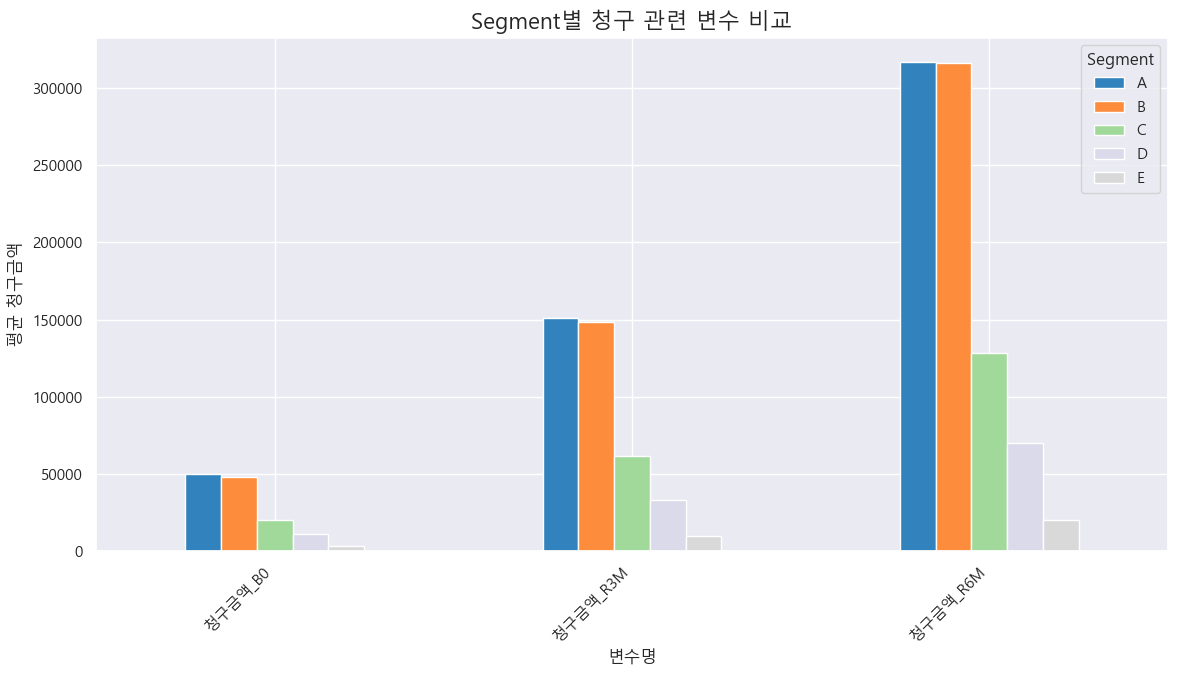

In [35]:
# 1. 변수 리스트 (청구 관련 변수)
columns_billing = [
    '청구금액_B0',
    '청구금액_R3M',
    '청구금액_R6M'
]

# 2. 데이터 불러오기 ('5.잔액정보'에 있을 가능성이 높으니 경로 조정 필요할 수 있음)
# 만약 다른 파일에 있으면 파일명 알려주세요.
df_billing = pd.read_parquet('open/train/4.청구입금정보', columns=['ID'] + columns_billing)
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])

# 3. 병합
df = pd.merge(df_member, df_billing, on='ID')

# 4. 세그먼트별 평균 계산
segment_means = df.groupby('Segment')[columns_billing].mean().round(1)

# 5. 표 출력
print("Segment별 청구 관련 변수 평균값")
display(segment_means)

# 6. 시각화
segment_means.T.plot(kind='bar', figsize=(12, 7), colormap='tab20c')

plt.title('Segment별 청구 관련 변수 비교', fontsize=16)
plt.ylabel('평균 청구금액')
plt.xlabel('변수명')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

### 분석 포인트
- A부터 E순으로 청구 금액이 점차 작아짐.

### 그래프가 이쁘게 나오지 않는 이유?
- 세부 항목 별로 그래프가 무조건적으로 A_B_C_D_E순으로 예쁘게 나오지는 않음.
> 세그먼트가 모든 항목에 대하여 절대적인 기준을 갖지 않는다는 점을 시사.

- 하나의 변수만으로 (그래프가 순서대로 나오지 않는 변수) 세그먼트를 설명하기에는 정보가 부족할 수도 있음.
> 변수 하나하나씩 따로 보기보다는 여러 지표들을 묶어서 종합적으로 판단해야함.